Section 1: Introduction

## Self-Attention Mechanism in Flax
In this notebook, we’ll explore the self-attention mechanism, a key component of transformer models used in large language models (LLMs). Self-attention allows a model to weigh the importance of different words in a sequence when processing each word, making it ideal for tasks like natural language understanding.

By the end, you’ll:
- Understand the theory behind self-attention.
- Implement it using Flax and JAX.
- Visualize attention weights on a small example.

Section 2: Theory

### Theory of Self-Attention
Self-attention computes a weighted sum of values (V) based on similarity scores between queries (Q) and keys (K). The formula is:

**Attention(Q, K, V) = softmax(QK^T / √d_k)V**

Where:
- Q (queries), K (keys), V (values) are projections of the input sequence.
- d_k is the dimension of the keys, used for scaling to prevent large values.

This mechanism lets the model focus on relevant parts of the input dynamically.

Section 3: Setup

In [1]:
# Install dependencies (if needed in your environment)
# !pip install jax jaxlib flax matplotlib

import jax
import jax.numpy as jnp
from flax import linen as nn
import matplotlib.pyplot as plt

# Set random seed for reproducibility
rng = jax.random.PRNGKey(0)

Section 4: Implementation

### Implementing Self-Attention in Flax
Let’s define a self-attention module using Flax’s `nn.Module`. We’ll assume the input is a sequence of vectors (e.g., word embeddings).

In [2]:
class SelfAttention(nn.Module):
    embed_dim: int  # Dimension of the input embeddings
    head_dim: int   # Dimension per attention head

    def setup(self):
        # Define linear layers for Q, K, V projections
        self.query = nn.Dense(features=self.head_dim)
        self.key = nn.Dense(features=self.head_dim)
        self.value = nn.Dense(features=self.head_dim)

    def __call__(self, x):
        # x shape: (batch_size, seq_len, embed_dim)
        q = self.query(x)  # (batch_size, seq_len, head_dim)
        k = self.key(x)    # (batch_size, seq_len, head_dim)
        v = self.value(x)  # (batch_size, seq_len, head_dim)

        # Compute attention scores
        scores = jnp.matmul(q, k.transpose(0, 2, 1))  # (batch_size, seq_len, seq_len)
        scores = scores / jnp.sqrt(self.head_dim)     # Scale by sqrt(d_k)
        attn_weights = nn.softmax(scores, axis=-1)    # Normalize scores

        # Apply attention weights to values
        output = jnp.matmul(attn_weights, v)  # (batch_size, seq_len, head_dim)
        return output, attn_weights

# Initialize the module
model = SelfAttention(embed_dim=64, head_dim=32)
params = model.init(rng, jnp.ones((1, 5, 64)))  # Example input: batch=1, seq_len=5

Section 5: Example and Visualization

### Example: Applying Self-Attention
Let’s test our implementation on a small sequence and visualize the attention weights.

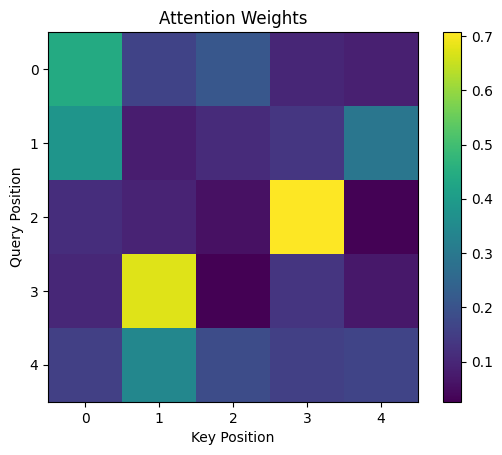

In [3]:
# Create a sample input (batch_size=1, seq_len=5, embed_dim=64)
x = jax.random.normal(rng, (1, 5, 64))
output, attn_weights = model.apply(params, x)

# Plot attention weights
plt.imshow(attn_weights[0], cmap='viridis')
plt.title("Attention Weights")
plt.xlabel("Key Position")
plt.ylabel("Query Position")
plt.colorbar()
plt.show()

Section 6: Conclusion

### Conclusion
You’ve now implemented a self-attention layer in Flax! This is a building block for transformers. In the next notebook, we’ll extend this to multi-head attention to capture different aspects of the input sequence.